In [9]:
%matplotlib inline
from pylab import *
import cv2
from glob import glob
from image_defs import *
import os

In [10]:
board_picture_folder='images/rotoimages/'
square_images_folder='images/rotoimages squares'
image_to_use_for_corners="images/rotoimages/roto1.jpg"

from corners import *


In [11]:
board_filenames=sorted(glob(board_picture_folder+"/*.jpg"))
print(len(board_filenames))

4


## Look at all the boards

roto1.jpg
roto2.jpg
roto3.jpg
roto4.jpg


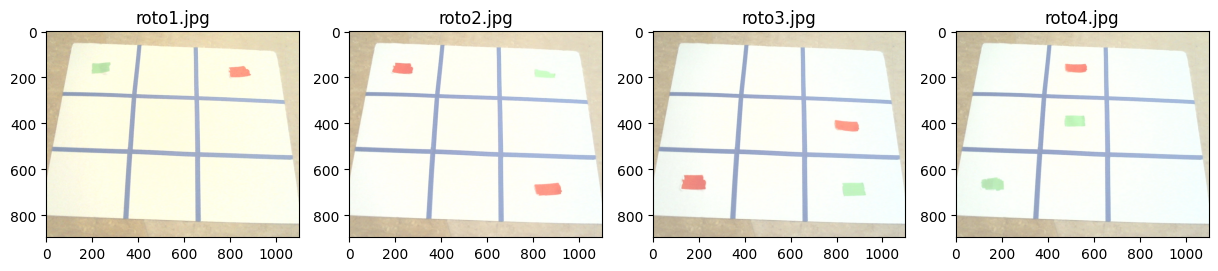

In [12]:
count=1
figure(figsize=(15,10))
for filename in board_filenames:
    subplot(3,4,count)

    image=imread(filename)
    image=image[:,300:1400]  # truncate if you need to
    
    imshow(image)

    
    base,name=os.path.split(filename)
    title(name)
    print(name)
    count+=1

In [6]:
board_states={
    'roto1.jpg':'102/000/000',
    'roto2.jpg':'201/000/001',
    'roto3.jpg':'000/002/201',
    'roto4.jpg':'020/010/100',
}

In [7]:
from Game import *

Version:  0.3.13


images/rotoimages//roto1.jpg 102/000/000
images/rotoimages squares/piece_1/square0_1.jpg
images/rotoimages squares/piece_0/square1_0.jpg
images/rotoimages squares/piece_2/square2_2.jpg
images/rotoimages squares/piece_0/square3_0.jpg
images/rotoimages squares/piece_0/square4_0.jpg
images/rotoimages squares/piece_0/square5_0.jpg
images/rotoimages squares/piece_0/square6_0.jpg
images/rotoimages squares/piece_0/square7_0.jpg
images/rotoimages squares/piece_0/square8_0.jpg
images/rotoimages//roto2.jpg 201/000/001
images/rotoimages squares/piece_2/square9_2.jpg
images/rotoimages squares/piece_0/square10_0.jpg
images/rotoimages squares/piece_1/square11_1.jpg
images/rotoimages squares/piece_0/square12_0.jpg
images/rotoimages squares/piece_0/square13_0.jpg
images/rotoimages squares/piece_0/square14_0.jpg
images/rotoimages squares/piece_0/square15_0.jpg
images/rotoimages squares/piece_0/square16_0.jpg
images/rotoimages squares/piece_1/square17_1.jpg
images/rotoimages//roto3.jpg 000/002/201
image

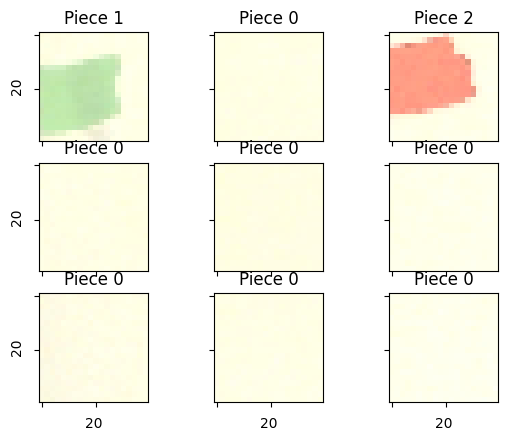

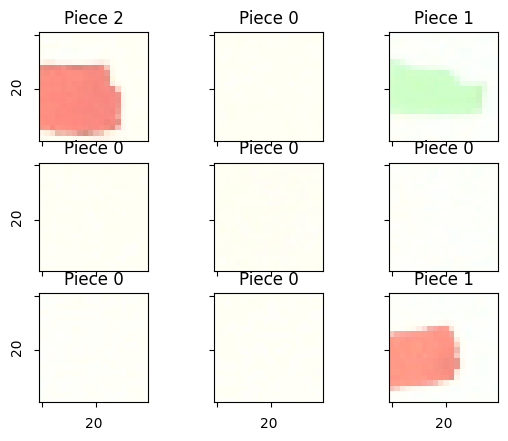

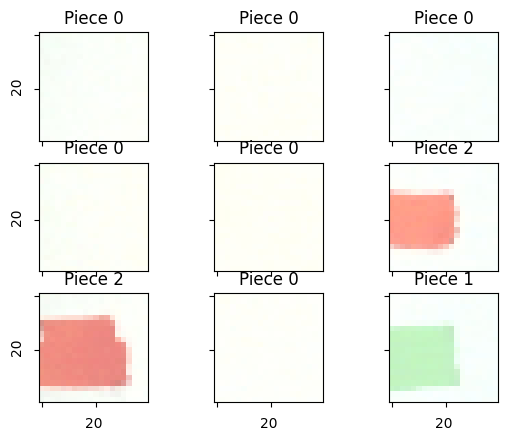

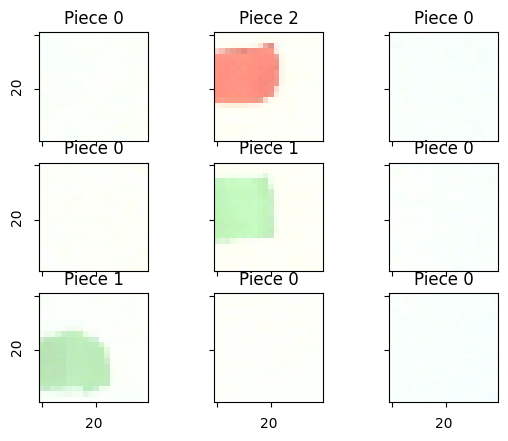

In [13]:
count=0
for name in board_states:
    filename=board_picture_folder+"/"+name
    board_string=board_states[name]
    
    state=Board(board_string)
    print(filename,board_string)
    image=imread(filename)

    im3=straighten_image(image,corners)

    squares=get_board_squares_from_image(im3,
                                     state.shape,
                                     middle_pixels=20)  # <=== check this
    


    if not os.path.exists(square_images_folder):
        print(f"Making folder {square_images_folder}")
        os.mkdir(square_images_folder)
    
    
    nr,nc=state.shape
    saveit=True

    figure()
    plot_count=0
    for r in range(nr):
        for c in range(nc):
    
            subplot(nr,nc,plot_count+1)
            imshow(squares[plot_count])
    
            shape=squares[plot_count].shape
            piece=state.board[plot_count]
            
            title(f"Piece {piece}")
            if c==0:
                ylabel(shape[0])
    
            if r==nr-1:
                xlabel(shape[1])
            gca().set_xticklabels([])
            gca().set_yticklabels([])
    
    
            if saveit:
                piece_folder=f"{square_images_folder}/piece_{piece}"
                if not os.path.exists(piece_folder):
                    print(f"Making folder {piece_folder}")
                    os.mkdir(piece_folder)
                
                fname=f"{piece_folder}/square{count}_{piece}.jpg"
                print(fname)
                imsave(fname,squares[plot_count])
            
            
            plot_count+=1  
            count+=1


